In [10]:
import numpy as np
import pickle, os
import matplotlib.pyplot as plt
import maze_environment as maze

objects = []

In [11]:
position = "110_180"
with (open("results_fixed_positions/"+position+"/data.pickle", "rb")) as openfile:
    while True:
        try:
            data = pickle.load(openfile)
            print("DATA LENGTH: "+str(len(data)))
            f = []
            current_generation = 0
            data_gen = []
            best_f = []
            average_f = []
            best_records = []
            for d in data:
                g = d.generation
                if g > current_generation:
                    current_generation = g
                    best_id = f.index(max(f))
                    # print(best_id)
                    best_records.append(data_gen[best_id])
                    best_f.append(max(f))
                    average_f.append(sum(f)/len(f))
                    f = []
                    data_gen = []
                f.append(d.fitness)
                data_gen.append(d)
            best_id = f.index(max(f))
            best_records.append(data_gen[best_id])
            best_f.append(max(f))
            average_f.append(sum(f)/len(f))
        except EOFError:
            break
# print(len(best_f))
print("Best fitness over generations: "+str(best_f))
print("Average fitness over generations: "+str(average_f))


DATA LENGTH: 101769
Best fitness over generations: [0.4132883578146648, 0.6759832473587964, 0.6759832473587964, 0.6759832473587964, 0.727132796189141, 0.7360407839396235, 0.7667816385486237, 0.7599578644724796, 0.7599578644724796, 0.7604866557995414, 0.7579367404329365, 0.7585902652007492, 0.7578939986030677, 0.7805438184534564, 0.7805438184534564, 0.7805438184534564, 0.7805438184534564, 0.7805438184534564, 0.7805438184534564, 0.7805438184534564, 0.7805438184534564, 0.7805438184534564, 0.7735780818471336, 0.7735780818471336, 0.7735780818471336, 0.7735780818471336, 0.7735780818471336, 0.7735780818471336, 0.7735780818471336, 0.7786944529143279, 0.7786944529143279, 0.7786944529143279, 0.7735780818471336, 0.7735780818471336, 0.7735780818471336, 0.7755303344755203, 0.764829837612234, 0.7734789510244034, 0.764829837612234, 0.7745032416476144, 0.7737584498378731, 0.7737584498378731, 0.7737584498378731, 0.7986497131529897, 0.7986497131529897, 0.7986497131529897, 0.7986497131529897, 0.798649713

In [12]:
count = 0
for i, g in enumerate (f):
    if int(g) == 1:
        count = count+1
print(str(count)+" individuals reached the goal.")

1 individuals reached the goal.


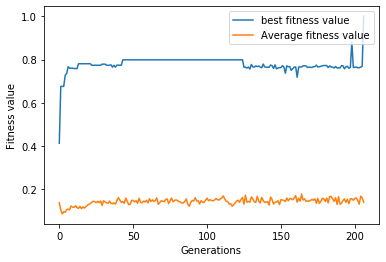

In [13]:
a, = plt.plot(best_f, label='best fitness value' )
b, = plt.plot(average_f, label='Average fitness value')
# c, = plt.plot(f, label="Fitness value of 1st generation")
plt.legend(handles=[a, b], loc=1)
plt.xlabel("Generations")
plt.ylabel("Fitness value")
plt.show()

In [14]:
# write the record store data
with open('results_fixed_positions/'+position+'_best_generations.pickle', 'wb') as f:
	pickle.dump(best_records, f)

# Draw all fixed positions and maze environment

In [2]:
local_dir = os.getcwd()
maze_env_config = os.path.join(local_dir, 'hard_maze.txt')
maze_env = maze.read_environment(maze_env_config)

Maze environment configured successfully from the file: /home/arslan/Desktop/behavioural_robotics/Chapter5/hard_maze.txt


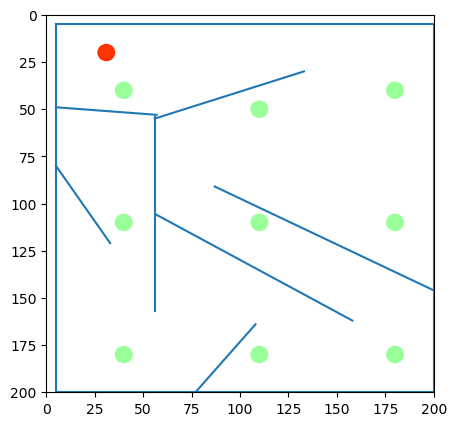

In [14]:
w = 200
h = 200
fig = plt.figure(figsize=(5,5))
fig.set_dpi(100)

ax = fig.subplots(1, 1, sharex=False)
ax.set_xlim(0, w)
ax.set_ylim(0, h)

for wall in maze_env.walls:
    line = plt.Line2D((wall.a.x, wall.b.x), (wall.a.y, wall.b.y), lw=1.5)
    ax.add_line(line)

# draw start point
start_locations = [(40, 40), (40, 110), (40, 180), (110, 50), (110, 110), (110, 180), (180, 40), (180, 110), (180, 180)]
for i, loc in enumerate(start_locations):
    start_circle = plt.Circle(loc, radius=5, facecolor=(0.6, 1.0, 0.6), edgecolor='w')
    ax.add_patch(start_circle)

# draw exit point
exit_circle = plt.Circle((maze_env.exit_point.x, maze_env.exit_point.y), 
                            radius=5, facecolor=(1.0, 0.2, 0.0), edgecolor='w')
ax.add_patch(exit_circle)
ax.invert_yaxis()